# Introduction to Python for Data Science Final Project 2: Logistic Regression

## Introduction

### Team Member:
1. Qaris Ardian Pratama

### Abstract

Australia merupakan negara yang sangat besar. Keadaan ini memungkinkan Australia untuk memiliki iklim yang berbeda antar wilayah negara tersebut. Sebagian besar wilayah di Australia memiliki empat musim. Akan tetapi, di wilayah Top End (termasuk Darwin, Katherine, Kakadu, dam Arnhem Land), Broome, Kimberley, dan Tropical North Queensland (Cairns, Whitsundays, dan Daintree Rainforest) memiliki dua musim saja, yaitu musim hujan (November - April) dan musim kering (Mei - Oktober).

Sebelum parahnya perubahan iklim, periode daripada musim itu sangat signifikan. Akan tetapi, semakin parahnya perubahan iklim membuat periode musim yang sudah dikenal tidak lagi signifikan karena musim hujan bisa saja terjadi di bulan Juni yang seharusnya masuk ke periode musim kering di beberapa wilayah Australia. Oleh karena itu, dibuatlah model prediksi dengan perbandingan metodel **Logistic Regression**, **Decision Tree**, dan **Random Forest** untuk membantu masyarakat Australia mengantisipasi hujan.

Dataset yang digunakan diambil dari Kaggle yang berjudul **Rain in Australia**. Isi dari dataset tersebut adalah record data hujan harian selama 10 tahun di Australia. Target variabel yang harus diprediksi adalah feature RainTomorrow, yaitu "Yes" maka besok harinya terjadi hujan 1mm atau lebih.

### Objective
Objective yang ingin dicapai dalam analisis ini adalah sebagai berikut.

* Mengetahui faktor-faktor yang berpengaruh signifikan dalam memprediksi hujan di Australia
* Menemukan model terbaik untuk digunakan dalam memprediksi hujan di Australia
* Memberikan insight yang dapat membantu pihak penduduk dalam bentuk charts

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

warnings.filterwarnings('ignore')
%matplotlib inline

## Data Loading

In [4]:
df = pd.read_csv('../../../../data_set/weatherAUS.csv')
pd.set_option('display.max_columns', None)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(145460, 23)

**Keterangan**
<br>
Terdapat **145460** baris data dan **23** kolom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Keterangan**
<br>
Feature Date bisa diubah dari tipe data object ke datetime untuk melihat apakah ada data yang kosong atau tidak sesuai. Dari keterangan Non-Null Count juga terlihat ada cukup banyak missing value pada dataset

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

### View Statistical Data

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## Data Cleaning

### Handling Missing Value

In [92]:
missing_value = pd.DataFrame({"Missing_Value":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
missing_value

,Missing_Value,Percent
Date,0,0.0 %
Location,0,0.0 %
MinTemp,1485,1.02 %
MaxTemp,1261,0.87 %
Rainfall,3261,2.24 %
Evaporation,62790,43.17 %
Sunshine,69835,48.01 %
WindGustDir,10326,7.1 %
WindGustSpeed,10263,7.06 %
WindDir9am,10566,7.26 %


In [93]:
# mencari categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('Terdapat {} categorical variables\n'.format(len(categorical)))

print('Yang termasuk categorical variables adalah :', categorical)

Terdapat 6 categorical variables

Yang termasuk categorical variables adalah : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [94]:
df[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [95]:
# mencari numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('Terdapat {} numerical variables\n'.format(len(numerical)))

print('Yang merupakan numerical variables adalah :', numerical)

Terdapat 17 numerical variables

Yang merupakan numerical variables adalah : ['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [96]:
#Display nemerical variables
df[numerical].head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2008-12-01,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,2008-12-02,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,2008-12-03,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,2008-12-04,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,2008-12-05,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


**Keterangan**
<br>
Secara umum terdapat categorical variabel dan numerical variabel yang harus di-handle dalam masalah missing value. Untuk tipe data categorical, missing value akan diisi dengan modus. Sedangkan, untuk tipe data numerical, missing value akan diisi dengan median.

In [97]:
df_clean = df.copy()
df_clean.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [98]:
# Mengisi missing value categorical dengan nilai modus
df_clean['WindGustDir'].fillna(df_clean['WindGustDir'].mode()[0], inplace=True)
df_clean['WindDir9am'].fillna(df_clean['WindDir9am'].mode()[0], inplace=True)
df_clean['WindDir3pm'].fillna(df_clean['WindDir3pm'].mode()[0], inplace=True)
df_clean['RainToday'].fillna(df_clean['RainToday'].mode()[0], inplace=True)
df_clean['RainTomorrow'].fillna(df_clean['RainTomorrow'].mode()[0], inplace=True)

In [99]:
missing_value = pd.DataFrame({"Missing_Value":df_clean.isna().sum(), "Percent":df_clean.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
missing_value

,Missing_Value,Percent
Date,0,0.0 %
Location,0,0.0 %
MinTemp,1485,1.02 %
MaxTemp,1261,0.87 %
Rainfall,3261,2.24 %
Evaporation,62790,43.17 %
Sunshine,69835,48.01 %
WindGustDir,0,0.0 %
WindGustSpeed,10263,7.06 %
WindDir9am,0,0.0 %


In [100]:
# Mengisi missing value numerical dengan nilai median
df_clean = df_clean.fillna(df_clean.median())

In [101]:
missing_value = pd.DataFrame({"Missing_Value":df_clean.isna().sum(), "Percent":df_clean.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
missing_value

,Missing_Value,Percent
Date,0,0.0 %
Location,0,0.0 %
MinTemp,0,0.0 %
MaxTemp,0,0.0 %
Rainfall,0,0.0 %
Evaporation,0,0.0 %
Sunshine,0,0.0 %
WindGustDir,0,0.0 %
WindGustSpeed,0,0.0 %
WindDir9am,0,0.0 %


**Keterangan**
<br>
Missing value sudah berhasil di-handle

## EDA and Visualization

In [102]:
df_clean.shape

(145460, 23)

### Categorical Data

In [110]:
df_categorical = df_clean[categorical]
df_categorical.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [111]:
label_encoder = preprocessing.LabelEncoder()
  
df_categorical['Location'] = label_encoder.fit_transform(df_categorical['Location'])
df_categorical['WindGustDir'] = label_encoder.fit_transform(df_categorical['WindGustDir'])
df_categorical['WindDir9am'] = label_encoder.fit_transform(df_categorical['WindDir9am'])
df_categorical['WindDir3pm'] = label_encoder.fit_transform(df_categorical['WindDir3pm'])
df_categorical['RainToday'] = label_encoder.fit_transform(df_categorical['RainToday'])
df_categorical['RainTomorrow'] = label_encoder.fit_transform(df_categorical['RainTomorrow'])

In [112]:
df_categorical.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2,13,13,14,0,0
1,2,14,6,15,0,0
2,2,15,13,15,0,0
3,2,4,9,0,0,0
4,2,13,1,7,0,0


**Keterangan**
<br>
Encode data categorical berdasarkan temuan yang sudah ada sebelumnya

In [113]:
corr_categorical = df_categorical.corr()
corr_categorical

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
Location,1.000000,-0.003732,-0.002439,0.008769,-0.005484,-0.005498
WindGustDir,-0.003732,1.000000,0.353790,0.563161,0.124675,0.048774
WindDir9am,-0.002439,0.353790,1.000000,0.301249,0.167718,0.035341
WindDir3pm,0.008769,0.563161,0.301249,1.000000,0.121719,0.028890
RainToday,-0.005484,0.124675,0.167718,0.121719,1.000000,0.305744
RainTomorrow,-0.005498,0.048774,0.035341,0.028890,0.305744,1.000000


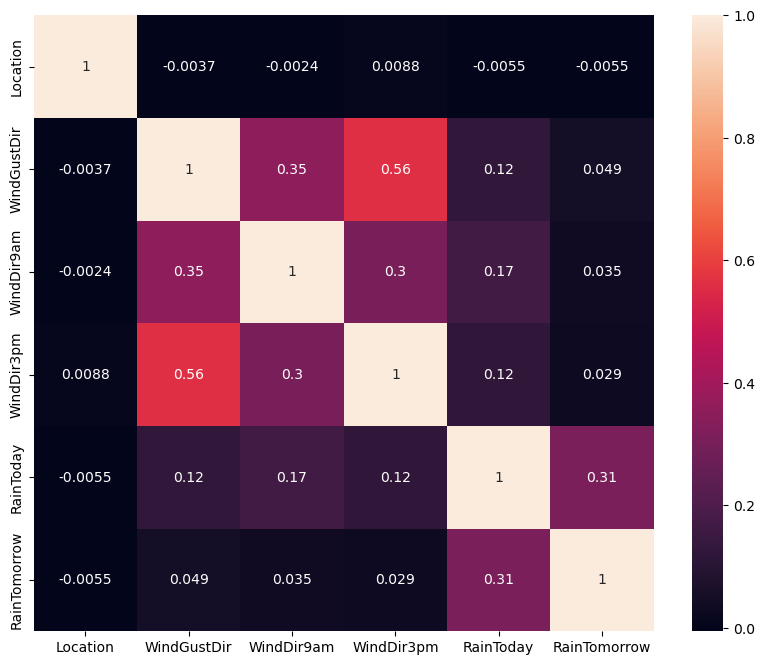

In [114]:
plt.figure(figsize=(10,8))

sns.heatmap(corr_categorical, annot=True)

# Save Plot
plt.savefig("corr_categ.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()